In [121]:
#Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import acos
from math import tan
from random import randint 
from time import time

In [122]:
#Definir constantes

pi = acos(-1)
eps = 1e-12

In [123]:
#Funcoes Graficas

def mult(num, lista):
    temp = []
    for item in lista:
        temp.append(item * num)
    return temp
    
def show(x, w, y2, cor):
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x, mult(w, x), color=cor)

def make_grafh( funcao , dados , respostas , points ) :
    value = pi/points
    listax = [-pi/2]
    for i in range(points) : listax.append(tan(listax[-1]+value))

    listay = {}
    for i in range(points+1) : 
        val = funcao( mult( listax[i] , dados ) , respostas )
        listay[listax[i]] = funcao( mult( listax[i] , dados ) , respostas ) 

    menor = 1e60
    temp = listay.copy().keys()
    for i in temp :
        menor = min(menor,listay[i])

    cont=10
    while(menor>0) : 
        menor//=10
        cont*=10

    for i in temp :
        if(listay[i]>cont) : listay.pop(i)

    plt.ylabel('Erro')
    plt.xlabel('A')
    plt.plot( listay.keys() , listay.values() , color='black', marker='o', linestyle='')
    plt.show()

    return 

def create_data( resposta , incerteza , pontos ) :
    
            listax = []
            for i in range(pontos) : listax.append(i+1)
        
            a = randint(-resposta,resposta)
        
            listay = []
            for i in range(pontos) :
                num  = (listax[i]*a) 
                num += randint(-incerteza,incerteza)
                listay.append( num )
        
            return listax, listay


In [124]:
#Funcoes de erro

def desvio_padrao_2( lista1 , lista2 , pot=2 ) : 
    if len(lista1) != len(lista2) : return -1 

    soma=0 
    for i in range(len(lista1)) :
        soma += ( lista1[i] - lista2[i] )**pot

    return soma/len(lista1)

def maior_diferenca( lista1 , lista2 ) : 
    if len(lista1) != len(lista2) : return -1 
    
    maior=0 
    for i in range(len(lista1)) :
        maior = max(maior,abs(lista1[i]-lista2[i]))

    return maior

def media_do_erro( lista1 , lista2 ) :
    if len(lista1) != len(lista2) : return -1 
    
    soma=0
    for i in range(len(lista1)) :
        soma += abs(lista1[i]-lista2[i])

    return soma/len(lista1)

In [125]:
#Funcao para a regressao linear simplificada

def busca_ternaria( reta , reais , funcao) :
    if len(reta) != len(reais) : return -1 
    
    l=-pi/2
    r=pi/2
    while(r-l>eps) :
        m1 = l + (r - l) / 3
        m2 = r - (r - l) / 3

        a1 = tan(m1)
        a2 = tan(m2)

        f1 = funcao(mult(a1,reta) , reais)     
        f2 = funcao(mult(a2,reta) , reais)

        if (f1 >= f2) :
            l = m1
        else :
            r = m2

    return tan(l)


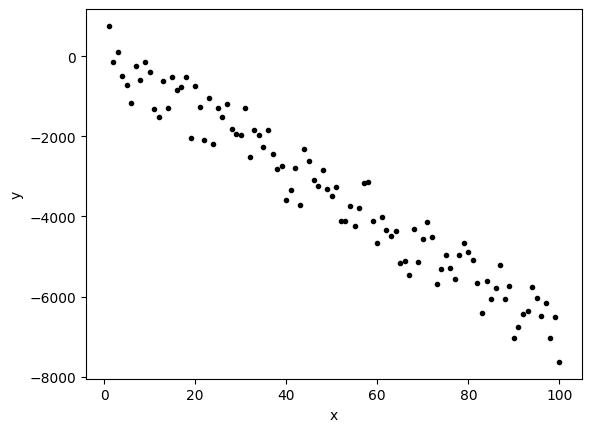

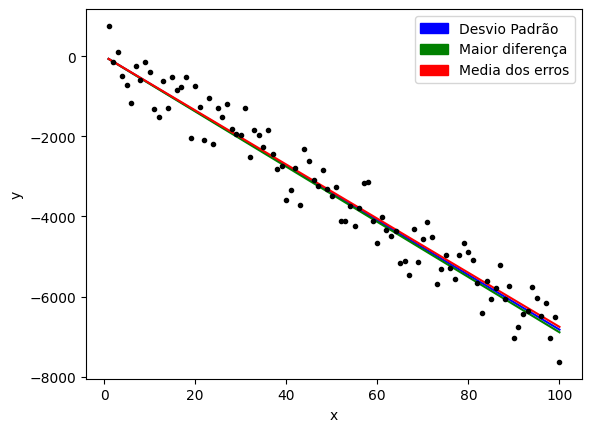

A inclinacao da reta feita utilizando o desvio padrao eh -68.26163144926197
A inclinacao da reta feita utilizando a maior diferenca eh -68.92800000322795
A inclinacao da reta feita utilizando a media dos erros eh -67.57142857442284
O código foi executado em 0.0 segundos


In [126]:
#Main

start = time()

pontos = 100000
dados , respostas = create_data(100,850,100) # maximo de 1e5 pontos por segundos

plt.ylabel('y')
plt.xlabel('x')
plt.plot(dados, respostas, color='black', marker='.', linestyle='')
plt.show()

w1 = busca_ternaria( dados , respostas , desvio_padrao_2 )
w2 = busca_ternaria( dados , respostas , maior_diferenca )
w3 = busca_ternaria( dados , respostas , media_do_erro )

#make_grafh( desvio_padrao_2 , dados , respostas , pontos)
#make_grafh( maior_diferenca , dados , respostas , pontos)
#make_grafh( media_do_erro , dados , respostas , pontos)

show(dados , w1 , respostas , 'blue' )
show(dados , w2 , respostas , 'green' )
show(dados , w3 , respostas , 'red' )

plt.legend(handles=[mpatches.Patch(color='blue', label='Desvio Padrão') , mpatches.Patch(color='green', label='Maior diferença') , mpatches.Patch(color='red', label='Media dos erros')])

plt.plot(dados, respostas, color='black', marker='.', linestyle='')
plt.show()

print(f'A inclinacao da reta feita utilizando o desvio padrao eh {w1}')
print(f'A inclinacao da reta feita utilizando a maior diferenca eh {w2}')
print(f'A inclinacao da reta feita utilizando a media dos erros eh {w3}')

print(f'O código foi executado em {(time()-start)//1} segundos')